In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

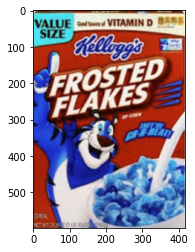

In [3]:
cereal = cv2.imread('cereal.png')
cereales = cv2.imread('cereales.png')
plt.imshow(cereal)

In [4]:
cereal = cv2.cvtColor(cereal, cv2.COLOR_BGR2RGB)
cereales = cv2.cvtColor(cereales, cv2.COLOR_BGR2RGB)

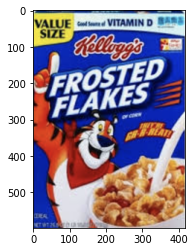

In [5]:
plt.imshow(cereal) #REAL

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

In [7]:
kp1, def1 = sift.detectAndCompute(cereal, None)
kp2, def2 = sift.detectAndCompute(cereales, None)

In [11]:
def2


array([[ 2.,  1.,  0., ..., 13.,  7.,  4.],
       [47., 46.,  5., ...,  0.,  0.,  0.],
       [ 4.,  6., 10., ...,  0.,  0.,  0.],
       ...,
       [13., 12.,  0., ...,  0., 32., 39.],
       [ 1.,  0.,  0., ...,  3.,  1., 18.],
       [23., 73., 49., ...,  2.,  0.,  7.]], dtype=float32)

In [12]:
indice = dict(algorithm=0, trees=5)

In [13]:
busqueda = dict(checks=50)

In [14]:
indice

{'algorithm': 0, 'trees': 5}

In [15]:
busqueda

{'checks': 50}

In [16]:
flan = cv2.FlannBasedMatcher()

In [18]:
emparejamiento = flan.knnMatch(def1, def2, k=2)

In [19]:
emparejamiento

[[<DMatch 0B457080>, <DMatch 0B457098>],
 [<DMatch 0B457050>, <DMatch 0B457260>],
 [<DMatch 0B457248>, <DMatch 0B457290>],
 [<DMatch 0B4571D0>, <DMatch 0B457020>],
 [<DMatch 0B4570B0>, <DMatch 0B4571E8>],
 [<DMatch 0B457110>, <DMatch 0B636458>],
 [<DMatch 0B636CF8>, <DMatch 0B44F458>],
 [<DMatch 0B44F260>, <DMatch 0B44F320>],
 [<DMatch 0B44F278>, <DMatch 0B44F3C8>],
 [<DMatch 0B44F410>, <DMatch 0B44F368>],
 [<DMatch 0B44F350>, <DMatch 0B44F338>],
 [<DMatch 0B44F488>, <DMatch 0B44F4A0>],
 [<DMatch 0B44F4D0>, <DMatch 0B44F500>],
 [<DMatch 0B44F4B8>, <DMatch 0B44F560>],
 [<DMatch 0B44F668>, <DMatch 0B44F578>],
 [<DMatch 0B44F5A8>, <DMatch 0B44F620>],
 [<DMatch 0B44F638>, <DMatch 0B44F650>],
 [<DMatch 0B44F5F0>, <DMatch 0B44F608>],
 [<DMatch 0B44F5C0>, <DMatch 0B44F5D8>],
 [<DMatch 0B44F590>, <DMatch 0B44F680>],
 [<DMatch 0B44F2F0>, <DMatch 0B44F3E0>],
 [<DMatch 0B44F698>, <DMatch 0B44F3F8>],
 [<DMatch 0B44F470>, <DMatch 0B44F3B0>],
 [<DMatch 0B44FD10>, <DMatch 0B44FD28>],
 [<DMatch 0B44FD

In [20]:
mejores = []

In [21]:
for e1, e2 in emparejamiento:
    #  este objeto en estos matriz de objetos
    if e1.distance < 0.7 * e2.distance:
        mejores.append([e1])
        

In [22]:
e1.distance

285.9510498046875

In [23]:
e2.distance

319.1316223144531

In [25]:
imagen_emparejamiento = cv2.drawMatchesKnn(cereal, kp1, cereales, kp2, mejores[0:30], None, flags=0)

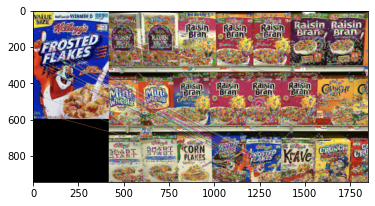

In [26]:
plt.imshow(imagen_emparejamiento)